EWMA models

    - calculating simple moving averages can allow us to see trend level behavior of a time series
    
    - Exponentially weighted moving average
    
    - basic SMA has weaknesses
        - smaller windows lead to more noise
        - always lags by size of window, always have missing data in beginning
        - does not reach full peak or valley of data due to averaging
        - does not inform about possible future behavior
        - extreme historical values can skew SMA
        
    - allows reduction of lag effect
    - puts more weight on recent values
    
    - amount of weight applied depends on actual parameters used and the number of periods given a window size

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
airline = pd.read_csv('airline_passengers.csv', index_col='Month')

In [4]:
airline.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


In [5]:
airline.dropna(inplace=True)

In [6]:
airline.index = pd.to_datetime(airline.index)

In [7]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [8]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(6).mean()

In [9]:
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(12).mean()

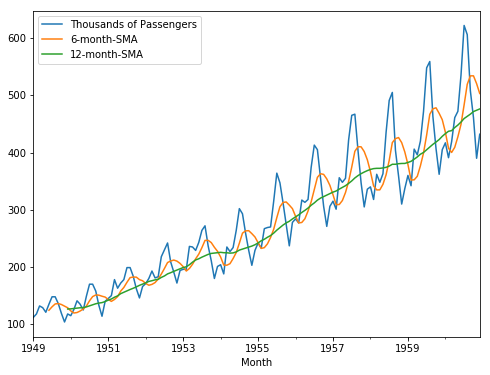

In [11]:
airline.plot(figsize=(8, 6))

In [12]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

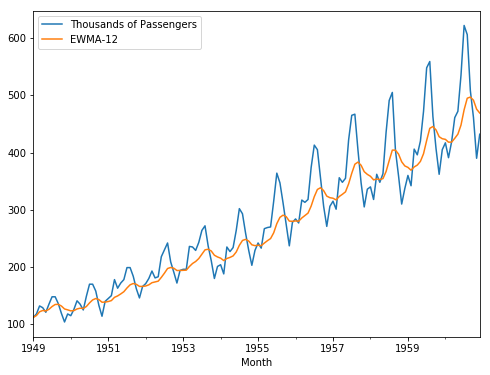

In [14]:
airline[['Thousands of Passengers', 'EWMA-12']].plot(figsize=(8,6))

Span -> 'N-day EW moving average'

center of mass -> more physical interpretation -> c=(s-1)/2

half life -> period of time for the exponential weight to reduce by half

alpha -> specifies smoothing factor directly